# CZII YOLO11 Training Baseline
 We created a training set adapted to YOLO from [the dataset baseline](https://www.kaggle.com/code/itsuki9180/czii-making-datasets-for-yolo).

In this notebook, we actually use it to train YOLO so that it can infer the xy coordinates of particles through 2D object detection.

# Install and Import modules

In [1]:
# !tar xfvz /kaggle/input/ultralytics-for-offline-install/archive.tar.gz
# !pip install --no-index --find-links=./packages ultralytics
# !rm -rf ./packages

In [2]:
EXP_NAME = "padding4_"

In [3]:
from tqdm import tqdm
import glob, os
from ultralytics import YOLO

# Prepare to train and instance YOLOmodel

In [4]:
# Load a pretrained model
model = YOLO("yolo11l.pt")  # load a pretrained model (recommended for training)

# Let's train YOLO!

In [5]:
# Train the model
_ = model.train(
    data="../../proc/yolo11_padding/czii_conf.yaml",
    name=EXP_NAME,
    epochs=25,
    warmup_epochs=3,
    optimizer='AdamW',
    cos_lr=True,
    lr0=5e-5,
    lrf=0.01,
    imgsz=640,
    device="0",
    weight_decay=0.01,
    batch=16,
    scale=0,
    flipud=0.5,
    fliplr=0.5,
    degrees=90,
    shear=5,
    mixup=0.2,
    copy_paste=0.25,
    seed=8620, # (｡•◡•｡)
)

New https://pypi.org/project/ultralytics/8.3.59 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.53 🚀 Python-3.12.8 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A4000, 16102MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=../../proc/yolo11_padding/czii_conf.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=padding4_4, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=8620, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None

Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  2    173824  ultralytics.nn.modules.block.C3k2            [128, 256, 2, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  2    691712  ultralytics.nn.modules.block.C3k2            [256, 512, 2, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  2   2234368  ultralytics.nn.modules.block.C3k2            [512, 512, 2, True]           
  7                  -1  1   2360320  ultralytics

train: Scanning /workspace/CZII/proc/yolo11_padding/datasets/czii_det2d/labels/train.cache... 1104 images, 272 backgrounds, 0 corrupt: 100%|██████████| 1104/1104 [00:00<?, ?it/s]
val: Scanning /workspace/CZII/proc/yolo11_padding/datasets/czii_det2d/labels/val.cache... 184 images, 30 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:00<?, ?it/s]


Plotting labels to /workspace/CZII/runs/detect/padding4_4/labels.jpg... 
optimizer: AdamW(lr=5e-05, momentum=0.937) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.01), 173 bias(decay=0.0)
MLflow: logging run_id(4e9054fbace74a70aa1ead606f2ac342) to /workspace/CZII/runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri /workspace/CZII/runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /workspace/CZII/runs/detect/padding4_4
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      11.2G      1.943       2.29      1.417        453        640: 100%|██████████| 69/69 [00:30<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.06s/it]

                   all        184       2640      0.352        0.2      0.228     0.0829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25        11G      1.291      1.374      1.079        437        640: 100%|██████████| 69/69 [00:28<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.62it/s]

                   all        184       2640      0.645      0.414      0.439      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25        11G      1.238      1.287      1.057        262        640: 100%|██████████| 69/69 [00:27<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.92it/s]

                   all        184       2640      0.497      0.491      0.483      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25        11G        1.2      1.252      1.038        383        640: 100%|██████████| 69/69 [00:28<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.85it/s]

                   all        184       2640      0.494      0.552      0.535       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25        11G      1.186      1.193      1.031        378        640: 100%|██████████| 69/69 [00:27<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.83it/s]

                   all        184       2640      0.518      0.562      0.569      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      11.1G      1.131      1.171      1.017        423        640: 100%|██████████| 69/69 [00:27<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.83it/s]

                   all        184       2640      0.546      0.573      0.581      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      11.1G      1.141      1.166      1.018        438        640: 100%|██████████| 69/69 [00:27<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.71it/s]

                   all        184       2640      0.655       0.58      0.604      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25        11G       1.14      1.147      1.014        279        640: 100%|██████████| 69/69 [00:27<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.48it/s]

                   all        184       2640      0.583      0.591      0.597      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      11.1G      1.109      1.109      1.006        439        640: 100%|██████████| 69/69 [00:27<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.80it/s]

                   all        184       2640      0.589      0.578      0.594      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25        11G      1.088      1.091     0.9958        448        640: 100%|██████████| 69/69 [00:28<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.82it/s]

                   all        184       2640       0.68      0.553      0.596      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      11.1G      1.102      1.093      1.002        246        640: 100%|██████████| 69/69 [00:28<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.96it/s]

                   all        184       2640      0.591      0.541      0.584      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25        11G      1.096       1.08     0.9987        505        640: 100%|██████████| 69/69 [00:28<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.76it/s]

                   all        184       2640      0.545      0.582      0.584      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25        11G       1.08      1.069     0.9955        515        640: 100%|██████████| 69/69 [00:27<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.95it/s]

                   all        184       2640      0.627      0.549      0.587       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25        11G      1.036      1.049     0.9793        366        640: 100%|██████████| 69/69 [00:28<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.94it/s]

                   all        184       2640      0.581      0.572      0.589      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      11.1G      1.069      1.058     0.9891        417        640: 100%|██████████| 69/69 [00:28<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.95it/s]

                   all        184       2640      0.598      0.577      0.602      0.417


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      10.9G     0.9518     0.9866     0.9456        307        640: 100%|██████████| 69/69 [00:27<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.83it/s]

                   all        184       2640      0.594      0.571      0.604      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      10.9G      0.945     0.9644     0.9426        379        640: 100%|██████████| 69/69 [00:27<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.94it/s]

                   all        184       2640      0.617      0.565      0.607      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      10.9G     0.9293     0.9468     0.9359        461        640: 100%|██████████| 69/69 [00:27<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.94it/s]

                   all        184       2640      0.607      0.576      0.613      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25        11G      0.932      0.939      0.936        292        640: 100%|██████████| 69/69 [00:27<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.93it/s]

                   all        184       2640      0.647      0.566      0.607      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25        11G     0.9176     0.9222     0.9353        376        640: 100%|██████████| 69/69 [00:27<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.69it/s]

                   all        184       2640      0.639       0.56      0.601      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      10.9G     0.9163     0.9068     0.9345        341        640: 100%|██████████| 69/69 [00:27<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.94it/s]

                   all        184       2640      0.629      0.552      0.599      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25        11G     0.9179     0.9031     0.9322        368        640: 100%|██████████| 69/69 [00:27<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.94it/s]

                   all        184       2640       0.63      0.551      0.602      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25        11G     0.9079     0.9021     0.9298        192        640: 100%|██████████| 69/69 [00:27<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.94it/s]

                   all        184       2640      0.625      0.558      0.604      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      10.9G     0.9133     0.8968       0.93        209        640: 100%|██████████| 69/69 [00:27<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.75it/s]

                   all        184       2640      0.628      0.553      0.604      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      10.9G     0.9133     0.8985     0.9318        442        640: 100%|██████████| 69/69 [00:27<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.69it/s]

                   all        184       2640      0.627      0.556      0.603      0.424



25 epochs completed in 0.227 hours.
Optimizer stripped from /workspace/CZII/runs/detect/padding4_4/weights/last.pt, 51.2MB
Optimizer stripped from /workspace/CZII/runs/detect/padding4_4/weights/best.pt, 51.2MB

Validating /workspace/CZII/runs/detect/padding4_4/weights/best.pt...
Ultralytics 8.3.53 🚀 Python-3.12.8 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A4000, 16102MiB)
YOLO11l summary (fused): 464 layers, 25,283,938 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.15s/it]


                   all        184       2640      0.595      0.571      0.604      0.428
          apo-ferritin        133        506      0.657      0.733      0.741      0.462
    beta-galactosidase        112        200      0.609     0.0545      0.224      0.131
              ribosome        145        899      0.629      0.793      0.794       0.55
         thyroglobulin        144        749      0.337      0.316      0.292      0.188
   virus-like-particle        105        286      0.741      0.958      0.971      0.811
Speed: 0.2ms preprocess, 18.1ms inference, 0.0ms loss, 14.3ms postprocess per image
Results saved to /workspace/CZII/runs/detect/padding4_4
MLflow: results logged to /workspace/CZII/runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'


In [8]:
model = YOLO(f"../../runs/detect/{EXP_NAME}4/weights/best.pt")
metrics = model.val(data="../../proc/yolo11_padding/czii_conf.yaml", imgsz=640, batch=16, conf=0.25, iou=0.6, device="0", save_json=True)  # no arguments needed, dataset and settings remembered
print(metrics.box.map)  # map50-95
print(metrics.box.map50)  # map50
print(metrics.box.map75)  # map75
print(metrics.box.maps)

Ultralytics 8.3.53 🚀 Python-3.12.8 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A4000, 16102MiB)


YOLO11l summary (fused): 464 layers, 25,283,938 parameters, 0 gradients, 86.6 GFLOPs


val: Scanning /workspace/CZII/proc/yolo11_padding/datasets/czii_det2d/labels/val.cache... 184 images, 30 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.50it/s]


                   all        184       2640      0.814      0.476      0.662      0.508
          apo-ferritin        133        506      0.838      0.605      0.735      0.502
    beta-galactosidase        112        200          1       0.01      0.505      0.404
              ribosome        145        899      0.757      0.699      0.755      0.551
         thyroglobulin        144        749      0.593      0.128      0.354       0.26
   virus-like-particle        105        286      0.882      0.941      0.962      0.826
Speed: 0.2ms preprocess, 14.1ms inference, 0.0ms loss, 15.7ms postprocess per image
Saving /workspace/CZII/runs/detect/val/predictions.json...
Results saved to /workspace/CZII/runs/detect/val
0.5084147276053584
0.6622420842216746
0.6163565477984101
[    0.50238     0.50841       0.404     0.55052     0.25953     0.82564]


# Prediction example

In [9]:
# results = model("../../proc/yolo11_padding/datasets/czii_det2d/images/val/TS_5_4_920.png")
# results[0].show()

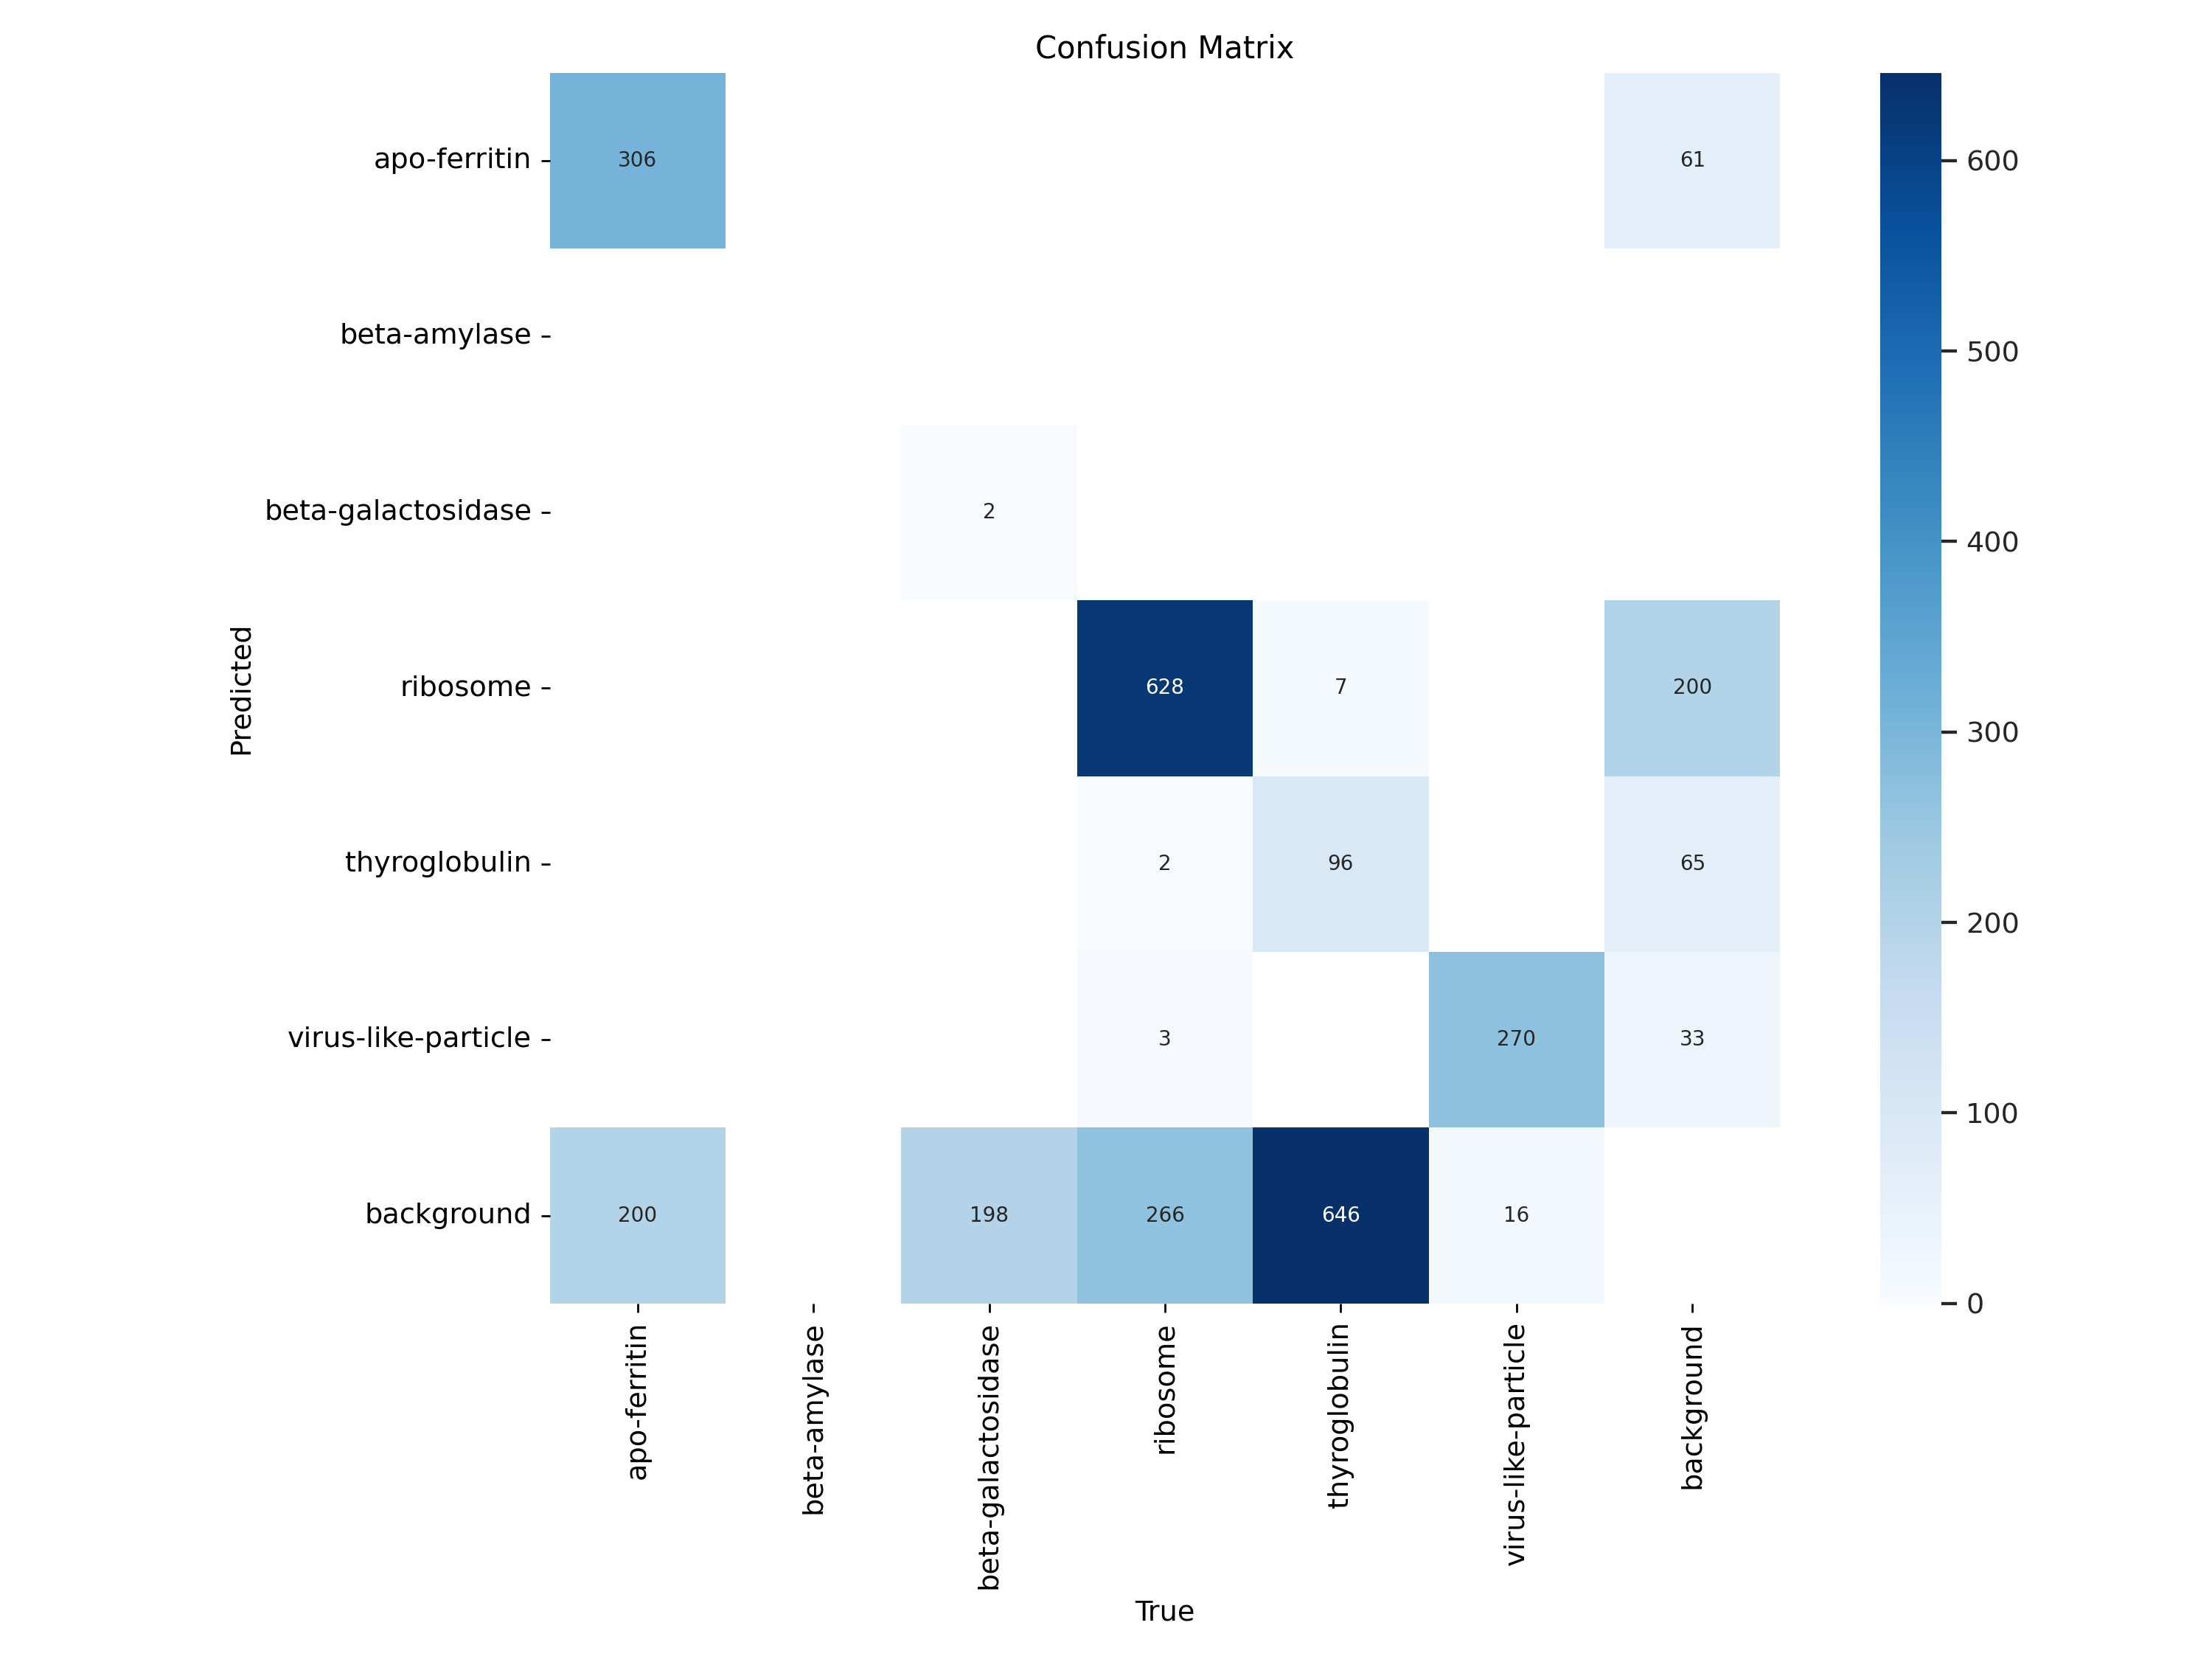

In [10]:
from IPython.display import Image as IPyImage

# Display the confusion matrix image from the specified directory in Kaggle
IPyImage(filename=f'../../runs/detect/{EXP_NAME}4/confusion_matrix.png', width=800)

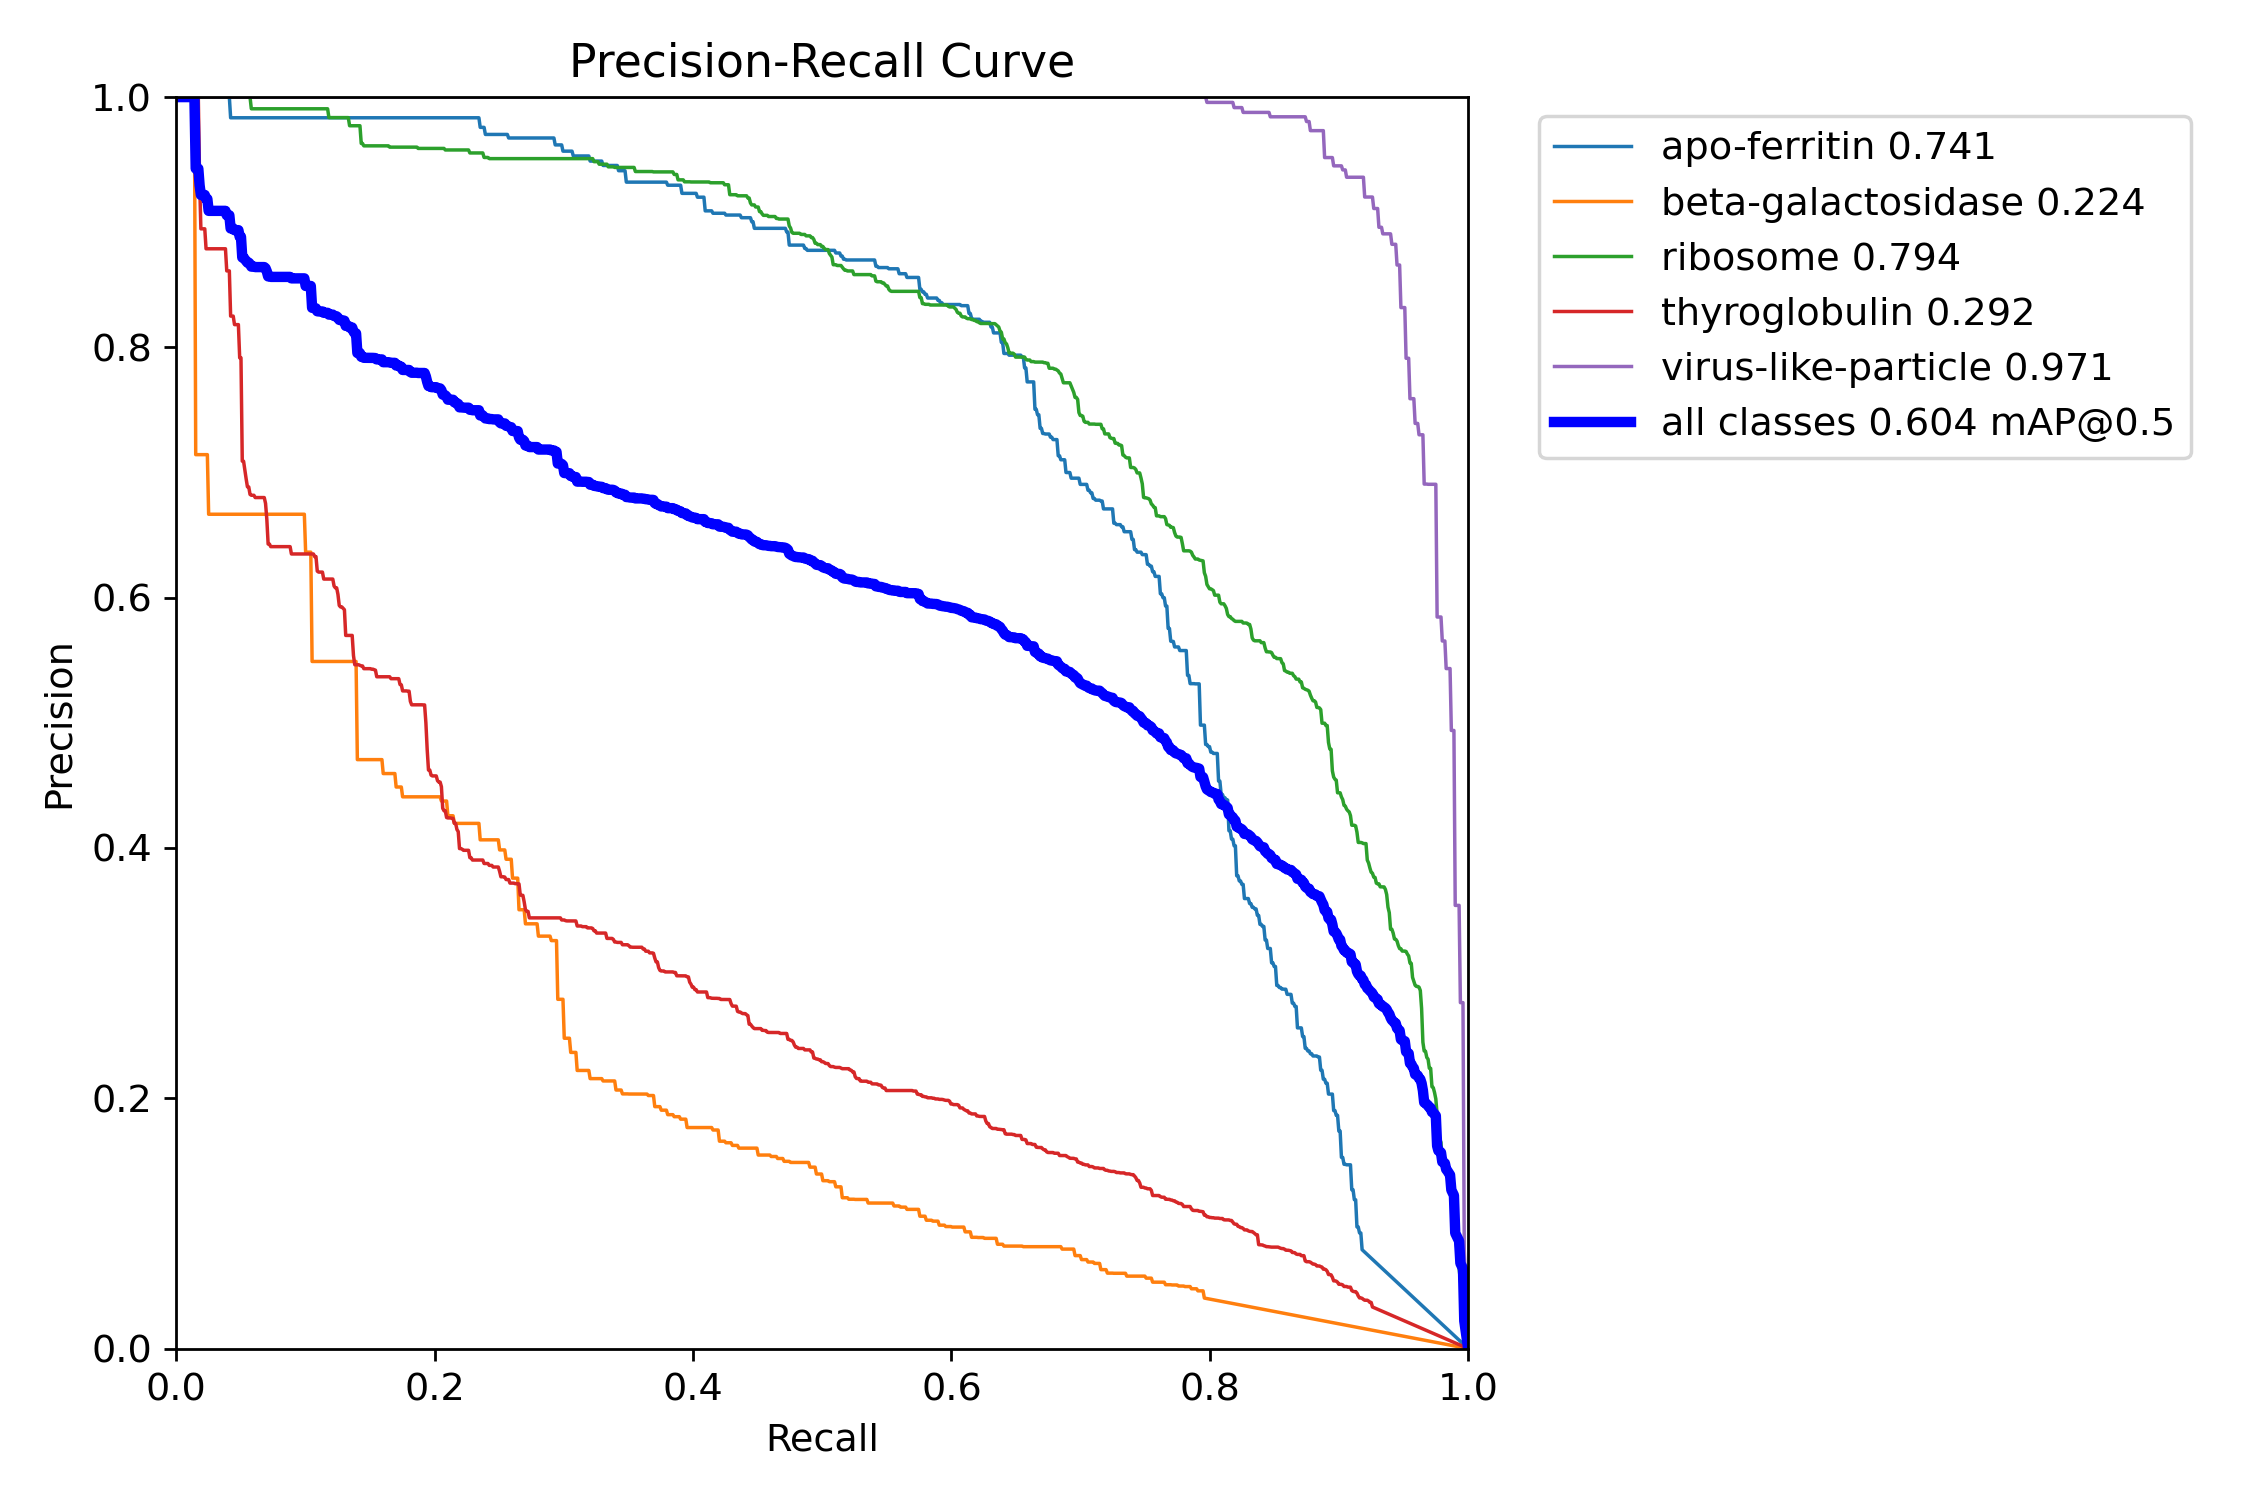

In [11]:
IPyImage(filename=f'../../runs/detect/{EXP_NAME}4/PR_curve.png', width=800)

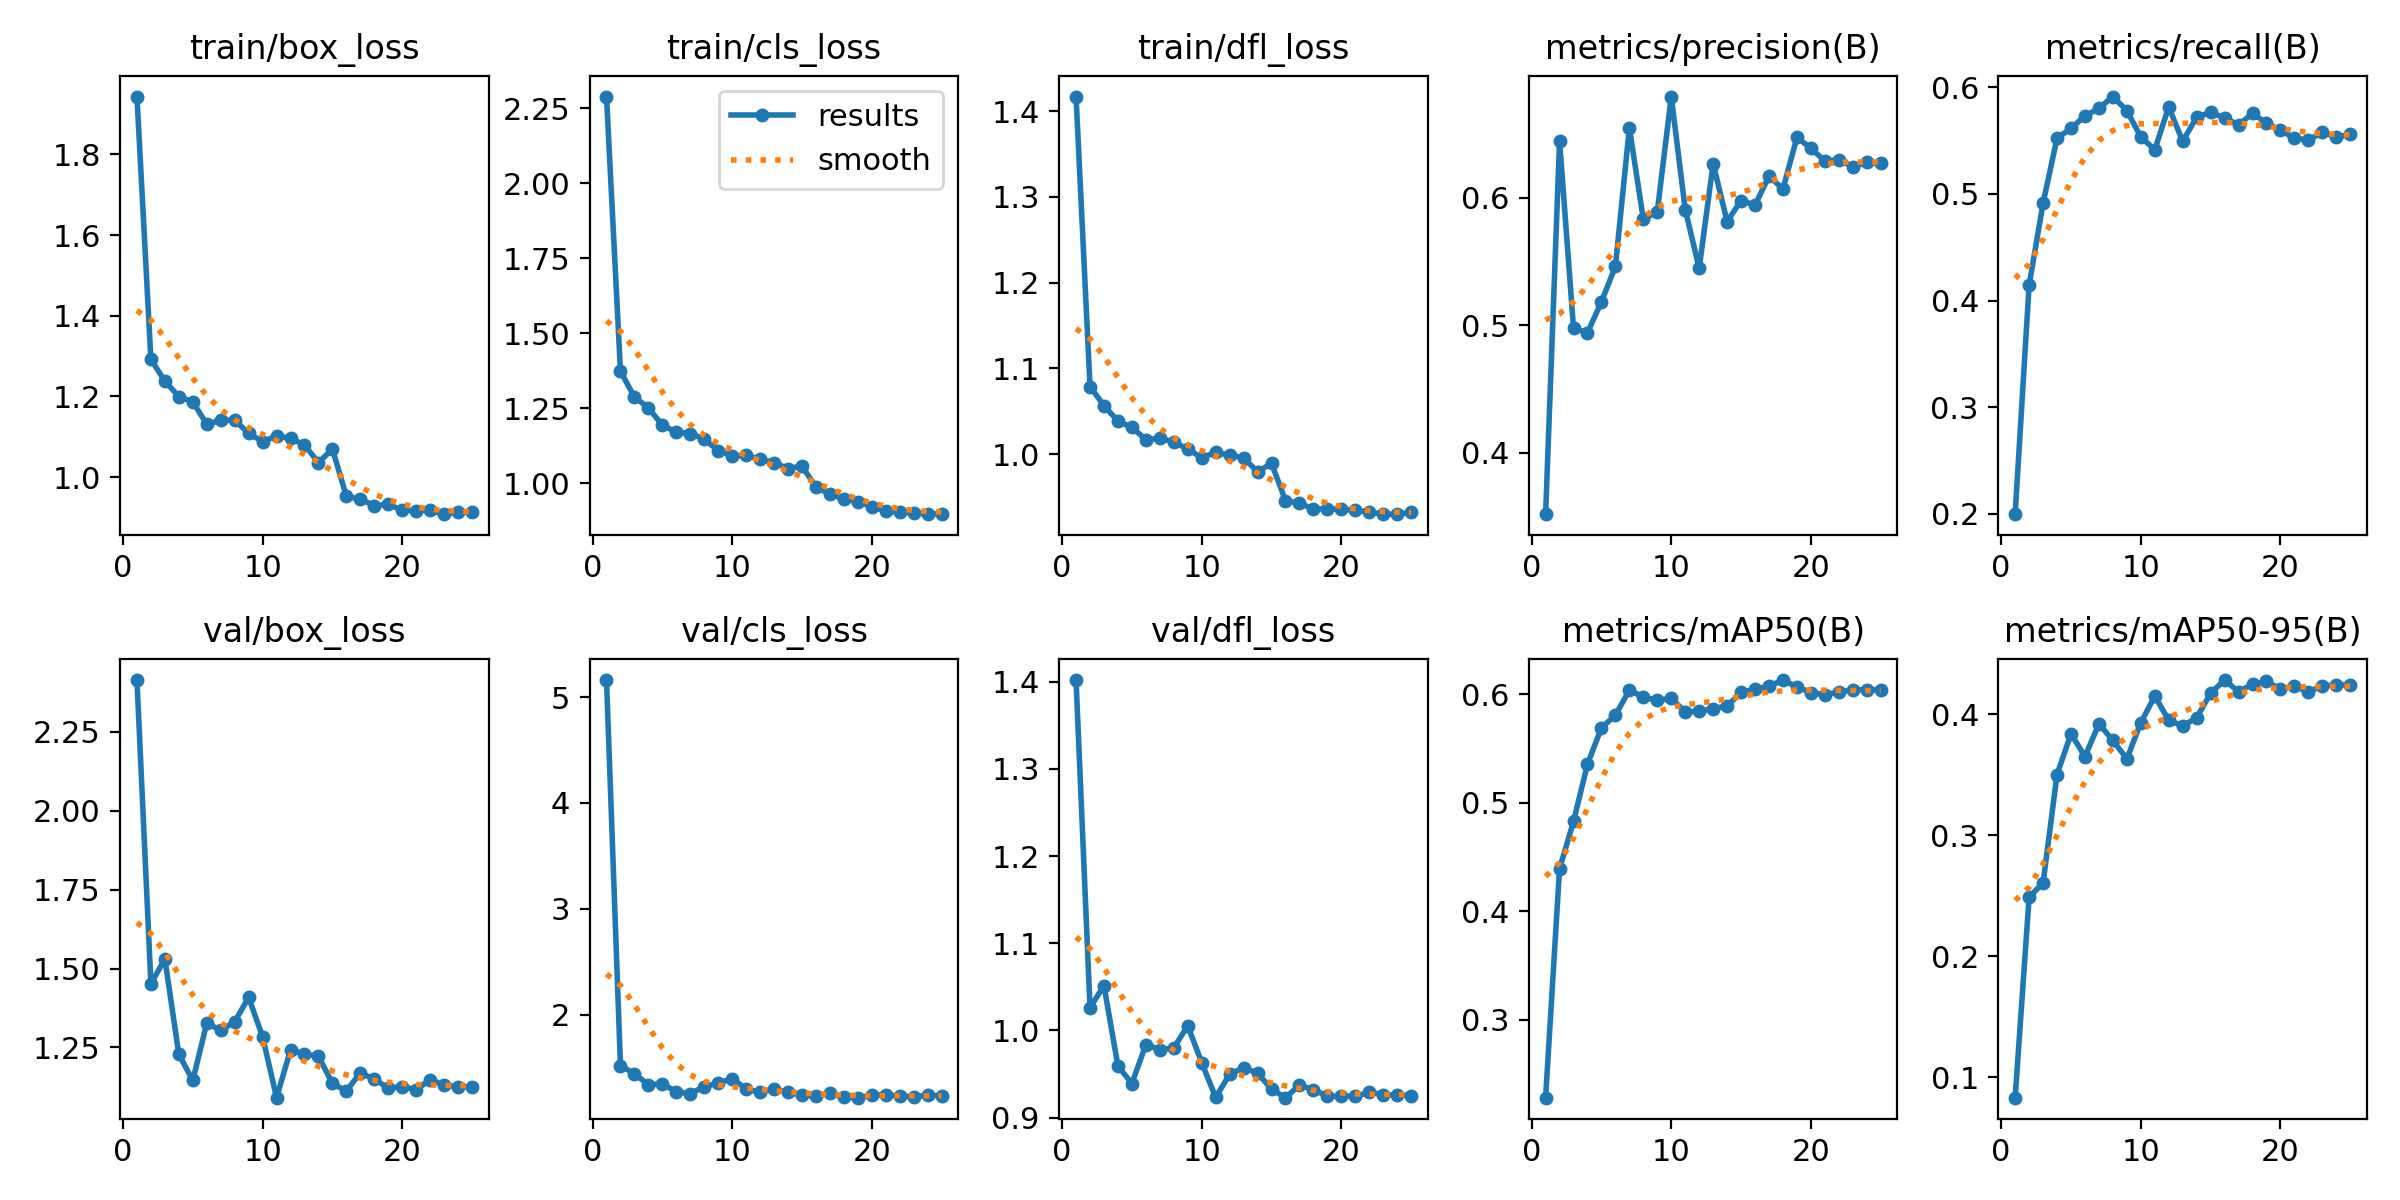

In [12]:
IPyImage(filename=f'../../runs/detect/{EXP_NAME}4/results.png', width=800)